In [6]:
from pylab import *
import numpy as np
%matplotlib inline

In [2]:
cd /CRACO/DATA_15/craco/SB064245/scans/00/20240728210315/kbrun/injections_withbc


/CRACO/DATA_15/craco/SB064245/scans/00/20240728210315/kbrun/injections_withbc


/CRACO/SOFTWARE/ban115/venv310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
ls

boxcar_hist_iblk0.npy   boxcar_hist_iblk2.npy       pcbb14.fil
boxcar_hist_iblk10.npy  boxcar_hist_iblk3.npy       plan_iblk12.pkl
boxcar_hist_iblk11.npy  boxcar_hist_iblk4.npy       plan_iblk6.pkl
boxcar_hist_iblk12.npy  boxcar_hist_iblk5.npy       psf.beam14.iblk0.fits
boxcar_hist_iblk13.npy  boxcar_hist_iblk6.npy       psf.beam14.iblk12.fits
boxcar_hist_iblk14.npy  boxcar_hist_iblk7.npy       psf.beam14.iblk6.fits
boxcar_hist_iblk15.npy  boxcar_hist_iblk8.npy       rank_000_trace.json
boxcar_hist_iblk16.npy  boxcar_hist_iblk9.npy       RFI_tfmask.b14.fil
boxcar_hist_iblk17.npy  candidates.b14.txt
boxcar_hist_iblk1.npy   flagging_stats_log_b14.csv


In [118]:
bcall = np.array([np.load(f'boxcar_hist_iblk{i}.npy') for i in range(5)])
#bc[bc < 0] = np.nan


In [119]:
bc = bcall[0,...]

In [120]:
bc.shape

(1024, 7, 256, 256)

In [121]:
idm = 124

In [122]:
it = 3
p = 128

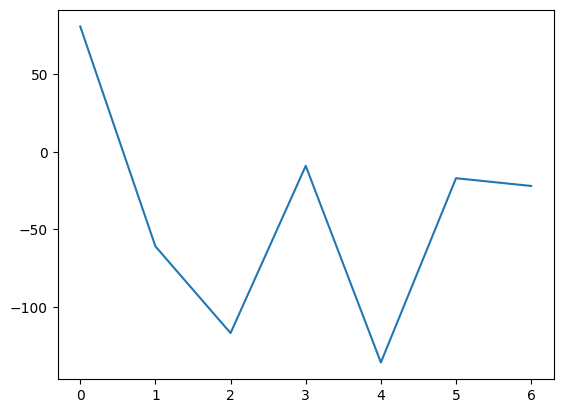

In [123]:
plot(bc[idm,:,p,p])

In [124]:
np.unravel_index(np.nanargmax(bc), bc.shape)

(123, 3, 0, 0)

In [125]:
np.nanmax(bc)

4022

Text(0, 0.5, 'DM')

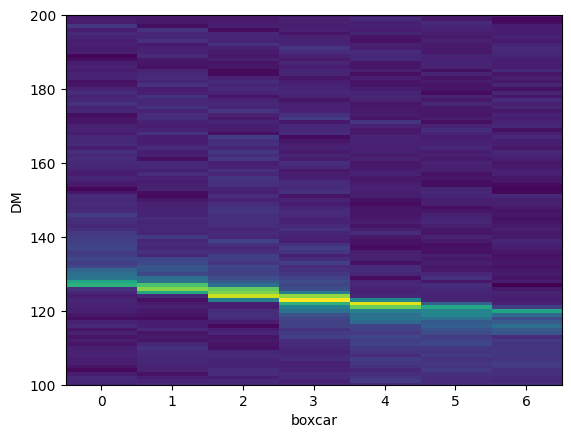

In [126]:
imshow(bc[:,:,0,0], aspect='auto', origin='lower')
ylim(100,200)
xlabel('boxcar')
ylabel('DM')

In [127]:
18000/120

150.0

In [128]:
bc.shape

(1024, 7, 256, 256)

(0.0, 200.0)

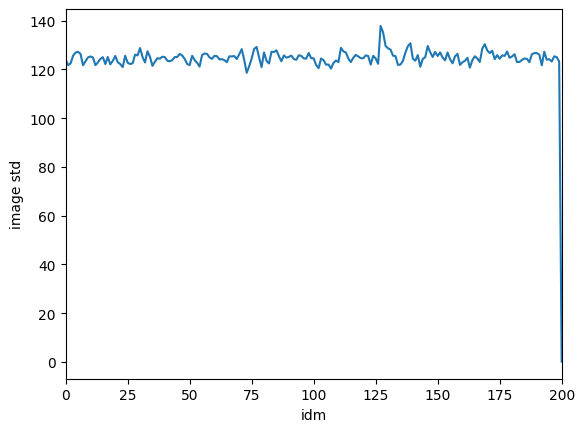

In [129]:
plot(bc[:,0,:,:].std(axis=(1,2)))
xlabel('idm')
ylabel("image std")
xlim(0,200)

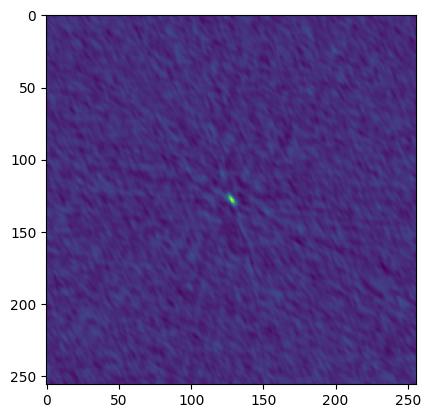

In [130]:
imshow(np.fft.fftshift(bc[123,3,:,:]))

(118.0, 138.0)

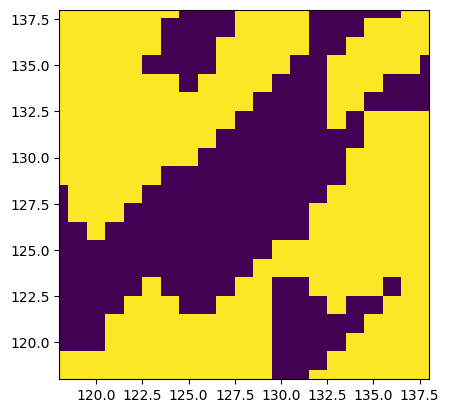

In [131]:
imshow(np.fft.fftshift(bc[123,3,:,:]) < 0)
xlim(128-10,128+10)
ylim(128-10,128+10)

Text(0.5, 1.0, 'coloured by injected S/N')

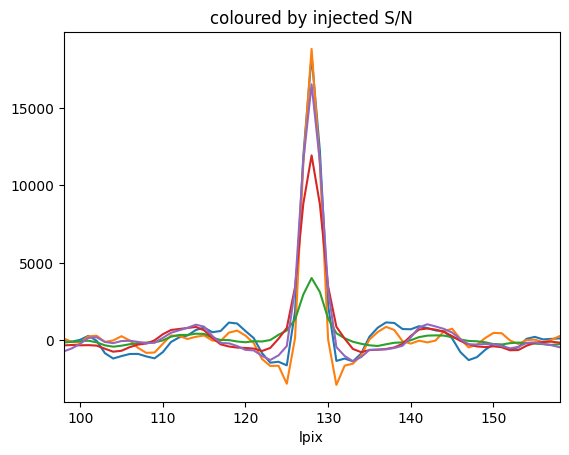

In [139]:
figure()
_ = plot(np.fft.fftshift(bcall[:,123,3,:,:])[:,128].T)
xlim(128-30,128+30)
xlabel('lpix')
title('coloured by injected S/N')

In [134]:
np.fft.fftshift(bcall[:,123,3,:,:])[:,128]


array([[ 201,  335,  471, ..., -248, -294,  -29],
       [-803, -680, -401, ..., -282, -476, -672],
       [-122,    2,  121, ..., -136, -170, -145],
       [  13,   36,   18, ...,  292,  203,   39],
       [  20, -140, -216, ...,  -66, -116,    0]], dtype=int16)

(0.0, 100.0)

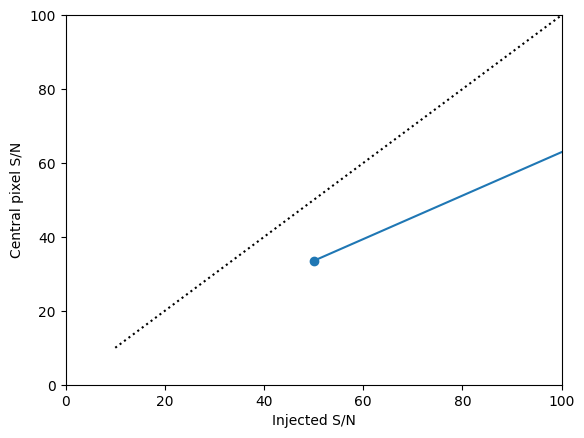

In [153]:
figure()
inputsn = [50,162,275,387,500]
plot(inputsn,bcall[:,123,3,0,0,]/120,marker='o')
plot([10,500],[10,500],'k:')
xlabel('Injected S/N')
ylabel('Central pixel S/N')
xlim(0,100)
ylim(0,100)